<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Packages" data-toc-modified-id="Loading-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Packages</a></span></li><li><span><a href="#EVE-Model" data-toc-modified-id="EVE-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EVE Model</a></span><ul class="toc-item"><li><span><a href="#EVE-Input-Data" data-toc-modified-id="EVE-Input-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>EVE Input Data</a></span></li><li><span><a href="#Running-EVE-Model" data-toc-modified-id="Running-EVE-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Running EVE Model</a></span></li></ul></li><li><span><a href="#EVE-Model-Analysis" data-toc-modified-id="EVE-Model-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EVE Model Analysis</a></span><ul class="toc-item"><li><span><a href="#Confidence-Ellipse-Function" data-toc-modified-id="Confidence-Ellipse-Function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Confidence Ellipse Function</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plots</a></span></li></ul></li><li><span><a href="#Distribution-of-Normal-vs-Abnormal-Cluster" data-toc-modified-id="Distribution-of-Normal-vs-Abnormal-Cluster-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Distribution of Normal vs Abnormal Cluster</a></span></li><li><span><a href="#Re-running-the-&quot;Normal-Cluster&quot;" data-toc-modified-id="Re-running-the-&quot;Normal-Cluster&quot;-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Re-running the "Normal Cluster"</a></span></li><li><span><a href="#Comparing-Dendrograms-between-clusters" data-toc-modified-id="Comparing-Dendrograms-between-clusters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparing Dendrograms between clusters</a></span></li></ul></div>

# Loading Packages

In [1]:
import json
import math
import scipy
import conorm
import mantel
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
import statistics
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
from scipy import stats
import scipy.stats
from scipy.stats import mannwhitneyu
stats.junk = lambda chisq, df: stats.chi2.sf(chisq, df)
import csv
import gffpandas.gffpandas as gffpd
import sklearn
from sklearn.metrics import r2_score
import os, re
import statistics
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from itertools import combinations
%load_ext rpy2.ipython

# EVE Model

## EVE Input Data

In [4]:
species_count = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/FPKM_across_species.csv', delimiter = '\t', index_col = 'index')
species_count.columns = [i + '_1' for i in species_count.columns]
species_count.drop(columns = ['CREN_1'], inplace = True)
NA1 = ['GB117', 'GB119', 'GB49', 'GB141', 'GB66', 'GB57', 'GB13', 'GB123', 'CC3063', 'CC3060', 'CC3061', 'CC3059', 'W13_1', 'W13_2']
NA2 = ['CC2344', 'CC2931', 'CL3', 'JG4', 'BMS1', 'CC2932', 'CC3079', 'CC1952', 'CC2343', 'CC2342']
    
mean_rawreads = pd.DataFrame()
rawreads_fpkm = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/NI_fpkm.csv', delimiter = '\t', index_col = 'index')
for i in NA1 + NA2:
    mean_rawreads[i] = rawreads_fpkm[[i + '_1', i + '_2', i + '_3']].mean(axis = 1)
mean_rawreads.columns = ['CREN_' + str(i + 1) for i in range(24)]

species_count = pd.concat([species_count, mean_rawreads], axis = 1).dropna()
species_count = species_count.replace(0, np.nan).dropna() ### remove rows with no reads

#### TPM Normalization ####
for i in species_count.columns:
    species_count[i] = species_count[i] * (10**(6)/species_count[i].sum())
species_count.columns = species_count.columns.str.replace('MALA', 'CMAL')
raw_reads_norm = np.log10(species_count + 0.01)
raw_reads_norm.to_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_expression_data_TPM2.csv', sep = '\t', index = True, header = True)

## Running EVE Model

fit with individual betas...
Estimate shared beta...
LLSharedBeta: beta = 38.19666  LL = -7745.504 
LLSharedBeta: beta = 61.80344  LL = -7975.089 
LLSharedBeta: beta = 23.60687  LL = -7364.508 
LLSharedBeta: beta = 14.58989  LL = -6760.965 
LLSharedBeta: beta = 9.017085  LL = -5871.126 
LLSharedBeta: beta = 5.572903  LL = -4677.095 
LLSharedBeta: beta = 3.444282  LL = -3244.521 
LLSharedBeta: beta = 2.128721  LL = -1731.788 
LLSharedBeta: beta = 1.31566

R[write to console]: Warning in value[[3L]](cond) :
R[write to console]: 
 
R[write to console]:  L-BFGS-B needs finite values of 'fn'. Unable to fit model to gene.data row 12



   2 gene(s) did not converge!  LL = NA 
LLSharedBeta: beta = 2.631221  LL = -2394.691 
LLSharedBeta: beta = 1.81816  LL = -1255.132 
LLSharedBeta: beta = 1.626222  LL = -931.3794 
LLSharedBeta: beta = 1.507598  LL = -719.8255 
LLSharedBeta: beta = 1.434284  LL = -584.7673 
LLSharedBeta: beta = 1.388974  LL = -499.7902 
LLSharedBeta: beta = 1.360971  LL = -446.6611 
LLSharedBeta: beta = 1.343664  LL = -413.5757 
LLSharedBeta: beta = 1.332967  LL = -393.058 
LLSharedBeta: beta = 1.326357  LL = -380.371 
LLSharedBeta: beta = 1.322271  LL = -372.4749 
LLSharedBeta: beta = 1.319746  LL = -367.6064 
LLSharedBeta: beta = 1.318185  LL = -364.5964 
LLSharedBeta: beta = 1.317221  LL = -362.7403 
LLSharedBeta: beta = 1.316625  LL = -361.5936 
LLSharedBeta: beta = 1.316257  LL = -360.8823 
LLSharedBeta: beta = 1.316029  LL = -360.4404 
LLSharedBeta: beta = 1.315888  LL = -360.1687 
LLSharedBeta: beta = 1.315801

R[write to console]: Warning in value[[3L]](cond) :
R[write to console]: 
 
R[write to console]:  L-BFGS-B needs finite values of 'fn'. Unable to fit model to gene.data row 1533



   2 gene(s) did not converge!  LL = NA 
LLSharedBeta: beta = 1.315942  LL = -360.2726 
LLSharedBeta: beta = 1.315847  LL = -360.093 
LLSharedBeta: beta = 1.315847  LL = -360.093 
fit with shared beta = 1.315847 ...


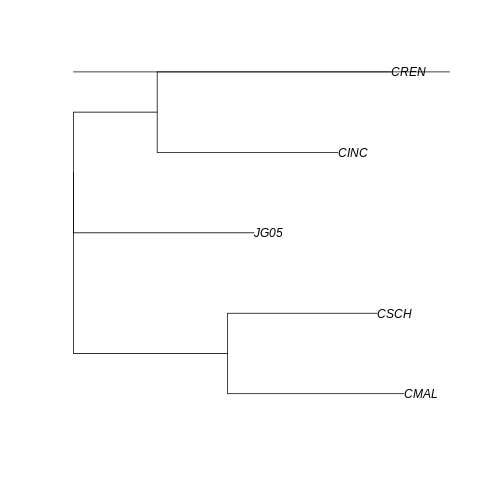

In [6]:
%%R
knitr::opts_chunk$set(
  collapse = TRUE,
  comment = "#>"
)

# remotes::install_gitlab("sandve-lab/evemodel")

library(evemodel)

# read tab separated table
exprTbl <- read.delim('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_normalcluster.csv')
exprMat <- as.matrix(exprTbl[,-1])
rownames(exprMat) <- exprTbl$index
head(exprMat)

library(ape)
speciesTree <- read.tree('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/speciestree.nwk')

# plot the species tree
plot(speciesTree)
add.scale.bar(x=0,y=5,length = 0.1)

# the species names in the tree is given by the tip.labels
speciesTree$tip.label

# the columns in the expression matrix are:
colnames(exprMat)

# remove the trailing number so that we get a vector with the species for each column
colSpecies <- sub("_.*$","",colnames(exprMat))

res <- betaSharedTest(tree = speciesTree, gene.data = exprMat, colSpecies = colSpecies)
write.csv(res$sharedBeta, "/research/projects/chlamydomonas/NIexpression/data/expression_divergence/shared_beta_normalcluster.csv", row.names=FALSE, quote=FALSE) 
head(res$sharedBeta)

pval = pchisq(res$LRT,df = 1,lower.tail = F)
write.csv(pval, "/research/projects/chlamydomonas/NIexpression/data/expression_divergence/pvalue_beta_normalcluster.csv", row.names=FALSE, quote=FALSE) 
saveRDS(res, file = "/research/projects/chlamydomonas/NIexpression/data/expression_divergence/beta_normalcluster.Rds")
write.csv(res$indivBetaRes$par, "/research/projects/chlamydomonas/NIexpression/data/expression_divergence/individual_beta_normalcluster.csv", row.names=FALSE, quote=FALSE) 

# EVE Model Analysis

## Confidence Ellipse Function

In [2]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The Axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the square root of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

## Analysis

In [2]:
species_count = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/FPKM_across_species.csv', delimiter = '\t', index_col = 'index')
species_count.columns = [i + '_1' for i in species_count.columns]
species_count.drop(columns = ['CREN_1'], inplace = True)
NA1 = ['GB117', 'GB119', 'GB49', 'GB141', 'GB66', 'GB57', 'GB13', 'GB123', 'CC3063', 'CC3060', 'CC3061', 'CC3059', 'W13_1', 'W13_2']
NA2 = ['CC2344', 'CC2931', 'CL3', 'JG4', 'BMS1', 'CC2932', 'CC3079', 'CC1952', 'CC2343', 'CC2342']
    
mean_rawreads = pd.DataFrame()
rawreads_fpkm = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/NI_fpkm.csv', delimiter = '\t', index_col = 'index')
for i in NA1 + NA2:
    mean_rawreads[i] = rawreads_fpkm[[i + '_1', i + '_2', i + '_3']].mean(axis = 1)
mean_rawreads.columns = ['CREN_' + str(i + 1) for i in range(24)]

species_count = pd.concat([species_count, mean_rawreads], axis = 1).dropna()
species_count = species_count.replace(0, np.nan).dropna()

#### Mean FPKM expression counts between and within species ####
a = mean_rawreads.loc[species_count.index]
a['within_species_mean'] = a.mean(axis = 1)
a['within_species_var'] = a.iloc[:, :-1].var(axis = 1)
species_count = pd.concat([species_count, a['within_species_mean'], a['within_species_var']], axis = 1)

B = species_count[['CINC_1', 'MALA_1', 'CSCH_1', 'JG05_1', 'within_species_mean']]
B['between_species_mean'] = B.mean(axis = 1)
B['between_species_var'] = B.iloc[:, :-1].var(axis = 1)
species_count = pd.concat([species_count, B['between_species_mean'], B['between_species_var']], axis = 1)

#### Variance of TMM normalized expression counts ####
EVE = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_expression_data_TPM2.csv', delimiter = '\t', index_col = 'index')

<ipython-input-2-b6b80fcbae11>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['between_species_mean'] = B.mean(axis = 1)
<ipython-input-2-b6b80fcbae11>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['between_species_var'] = B.iloc[:, :-1].var(axis = 1)


In [3]:
CREN_average_ED = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/extra_info.csv', delimiter = '\t', index_col = 'Unnamed: 0')
index = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_expression_data_TPM2.csv', delimiter = '\t', index_col = 'index')
pvalue = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/pvalue_beta_TPM2.csv', delimiter = ',', names = ['pval'], skiprows = 1)
pvalue.index = index.index
individual_beta = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/individual_beta_TPM2.csv', delimiter = ',')
individual_beta.index = index.index
shared_beta = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/shared_beta_TPM2.csv', delimiter = ',', names = ['sharedbeta'], skiprows = 1)
beta = pd.concat([pvalue, individual_beta[['sigma2', 'beta']]], axis = 1)
beta['within_variance'] = beta['beta'] * beta['sigma2']
beta['shared_beta'] = shared_beta.iloc[0][0]
beta['selection'] = 'stabilizing'
for i in beta.index:
    beta.loc[beta.loc[(beta['pval'] <= 0.05) & (beta['beta'] < beta['shared_beta'])].index, 'selection'] = 'directional'
    beta.loc[beta.loc[(beta['pval'] <= 0.05) & (beta['beta'] > beta['shared_beta'])].index, 'selection'] = 'balancing'
beta = pd.concat([beta, CREN_average_ED[['Vg', 'average_ED', 'average_Vm']]], axis = 1)

beta['color'] = 'lightgrey'
beta.loc[beta.loc[beta['selection'] == 'directional'].index, 'color'] = 'red'
beta['weight'] = beta['pval']
beta.loc[beta.loc[beta['color'] == 'red'].index, 'weight'] = beta['pval']**(-1)

## Plots

<ipython-input-17-38fb25fc7c33>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  alldata.loc[cluster1_genes, 'cluster'] = 1


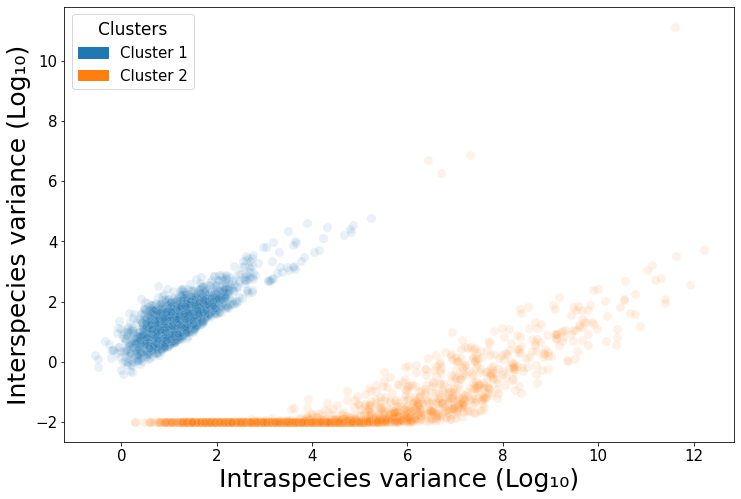

In [17]:
alldata = beta
alldata = pd.concat([alldata, species_count[['between_species_mean', 'within_species_mean', 'within_species_var', 'between_species_var']]], axis = 1).dropna()
alldata['Vg/Vm'] = alldata['Vg']/alldata['average_Vm']
cluster1 = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_normalcluster.csv', delimiter = '\t', index_col = 'Unnamed: 0')
cluster1_genes = set(cluster1.index).intersection(alldata.index)
alldata['cluster'] = 2
alldata.loc[cluster1_genes, 'cluster'] = 1

plt.figure(figsize = (12, 8))

ax1 = sns.scatterplot(x = np.log10(alldata.loc[alldata['cluster'] == 1]['within_variance'] + 0.01), y = np.log10(alldata.loc[alldata['cluster'] == 1]['sigma2'] + 0.01), s = 80, alpha = 0.1, label = 'Cluster 1')
ax2 = sns.scatterplot(x = np.log10(alldata.loc[alldata['cluster'] == 2]['within_variance'] + 0.01), y = np.log10(alldata.loc[alldata['cluster'] == 2]['sigma2'] + 0.01), s = 80, alpha = 0.1, label = 'Cluster 2')

clus1_color = mpatches.Patch(color='#1f77b4', label='Cluster 1')
clus2_color = mpatches.Patch(color='#ff7f0e', label='Cluster 2')
plt.legend(handles = [clus1_color, clus2_color], fontsize = 15, title = 'Clusters', title_fontsize = 17)

#### Formatting Log10 ####
element = 'Log'
subscript1 = "\u2081"
subscript0 = "\u2080"

plt.xlabel('Intraspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.ylabel('Interspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/EVE_model_full.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

<ipython-input-8-b278bb7945bc>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1 = sns.scatterplot(x = np.log10(part2.loc[part2['color'] == 'red']['within_variance'] + 0.01), y = np.log10(part2.loc[part2['color'] == 'red']['sigma2'] + 0.01), s = 80, alpha = 0.2, color = 'red', hue = part2.loc[part2['color'] == 'red']['weight'], palette = sns.color_palette("Blues", as_cmap=True), size = part2.loc[part2['color'] == 'red']['weight'])


(array([-2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8]),
 [Text(0, -2.2, '−2.2'),
  Text(0, -2.0, '−2.0'),
  Text(0, -1.8000000000000003, '−1.8'),
  Text(0, -1.6, '−1.6'),
  Text(0, -1.4000000000000001, '−1.4'),
  Text(0, -1.2000000000000002, '−1.2'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.8, '−0.8')])

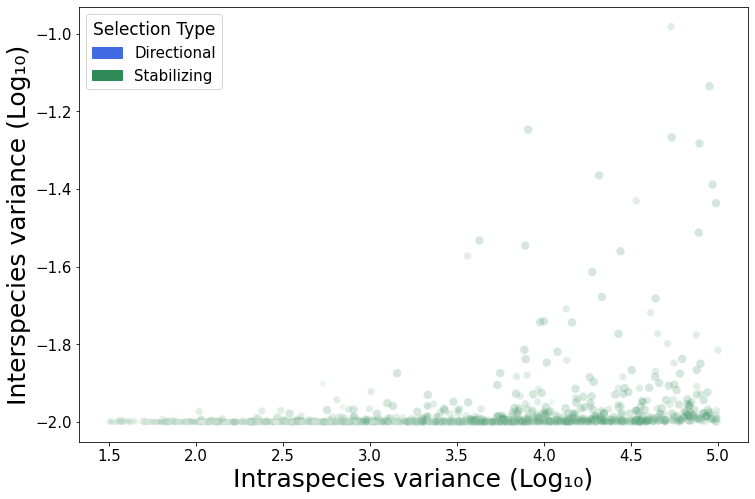

In [8]:
cluster1 = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_normalcluster.csv', delimiter = '\t', index_col = 'Unnamed: 0')
part2 = beta.drop(cluster1.index).loc[(beta['within_variance'] <= 10**(5)) & (beta['within_variance'] >= 10**(1.5))]
part2 = pd.concat([part2, species_count[['between_species_mean', 'within_species_mean', 'within_species_var', 'between_species_var']]], axis = 1).dropna()
part2['Vg/Vm'] = part2['Vg']/part2['average_Vm']
# alldata = alldata.loc[alldata['between_species_mean'] >= 40]

plt.figure(figsize = (12, 8))

ax2 = sns.scatterplot(x = np.log10(part2.loc[part2['color'] == 'lightgrey']['within_variance'] + 0.01), y = np.log10(part2.loc[part2['color'] == 'lightgrey']['sigma2'] + 0.01), s = 80, alpha = 0.2, color = 'blue', hue = part2.loc[part2['color'] == 'lightgrey']['weight'], palette = sns.light_palette("seagreen", as_cmap=True), size = part2.loc[part2['color'] == 'lightgrey']['weight'])
ax1 = sns.scatterplot(x = np.log10(part2.loc[part2['color'] == 'red']['within_variance'] + 0.01), y = np.log10(part2.loc[part2['color'] == 'red']['sigma2'] + 0.01), s = 80, alpha = 0.2, color = 'red', hue = part2.loc[part2['color'] == 'red']['weight'], palette = sns.color_palette("Blues", as_cmap=True), size = part2.loc[part2['color'] == 'red']['weight'])

stab = mpatches.Patch(color='seagreen', label='Stabilizing')
direc = mpatches.Patch(color='royalblue', label='Directional')
plt.legend(handles=[direc, stab], title = 'Selection Type', fontsize = 15, title_fontsize = 17)

plt.xlabel('Intraspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.ylabel('Interspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([-4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, -4.0, '−4'),
  Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

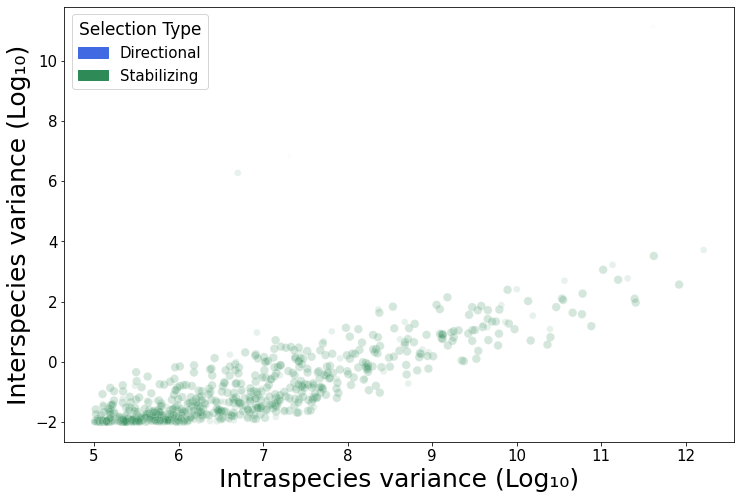

In [17]:
part3 = beta.drop(cluster1.index).loc[beta['within_variance'] >= 10**(5)]
part3 = pd.concat([part3, species_count[['between_species_mean', 'within_species_mean', 'within_species_var', 'between_species_var']]], axis = 1).dropna()
part3['Vg/Vm'] = part3['Vg']/part3['average_Vm']

plt.figure(figsize = (12, 8))

ax2 = sns.scatterplot(x = np.log10(part3.loc[part3['color'] == 'lightgrey']['within_variance'] + 0.01), y = np.log10(part3.loc[part3['color'] == 'lightgrey']['sigma2'] + 0.01), s = 80, alpha = 0.2, color = 'blue', hue = part3.loc[part3['color'] == 'lightgrey']['weight'], palette = sns.light_palette("seagreen", as_cmap=True), size = part3.loc[part3['color'] == 'lightgrey']['weight'])
ax1 = sns.scatterplot(x = np.log10(part3.loc[part3['color'] == 'red']['within_variance'] + 0.01), y = np.log10(part3.loc[part3['color'] == 'red']['sigma2'] + 0.01), s = 80, alpha = 0.2, color = 'red', hue = part3.loc[part3['color'] == 'red']['weight'], palette = sns.color_palette("Blues", as_cmap=True), size = part3.loc[part3['color'] == 'red']['weight'])

stab = mpatches.Patch(color='seagreen', label='Stabilizing')
direc = mpatches.Patch(color='royalblue', label='Directional')
plt.legend(handles=[direc, stab], title = 'Selection Type', fontsize = 15, title_fontsize = 17)

plt.xlabel('Intraspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.ylabel('Interspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Distribution of Normal vs Abnormal Cluster

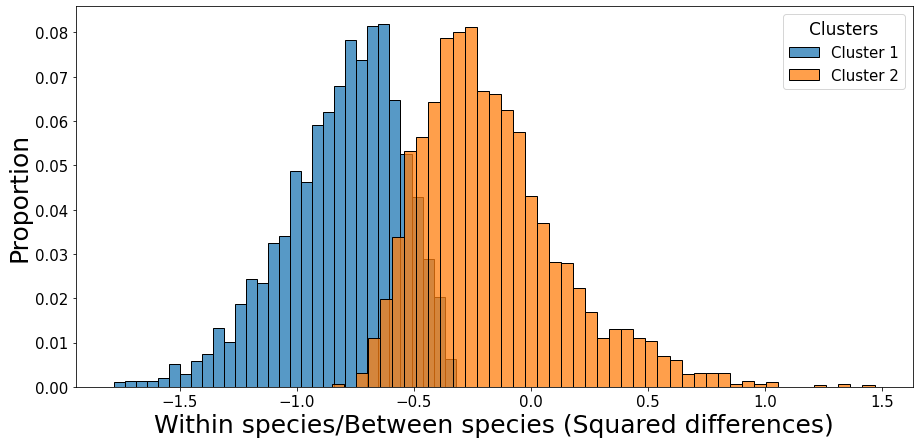

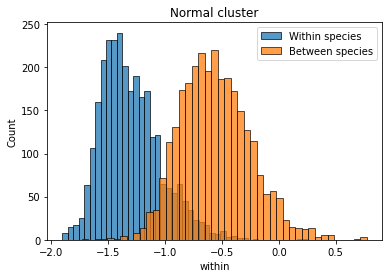

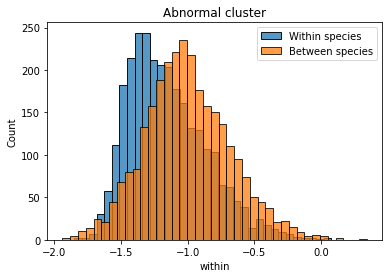

In [3]:
a = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_abnormalcluster.csv', delimiter = '\t', index_col = 'index')
b = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_normalcluster.csv', delimiter = '\t', index_col = 'Unnamed: 0')
a['CREN_mean'] = a[['CREN_'+ str(i+1) for i in range(24)]].mean(axis = 1)
b['CREN_mean'] = b[['CREN_'+ str(i+1) for i in range(24)]].mean(axis = 1)

import itertools

##########################
#### Abnormal cluster ####
##########################
species = a[['CREN_mean', 'CSCH_1', 'JG05_1', 'CMAL_1', 'CINC_1']]
within = a[['CREN_'+ str(i+1) for i in range(24)] + ['CREN_mean']]

total_between = []
total_within = []

for idx in species.index:
    btw_avg = []
    for i in species.columns[1:]:
        btw_avg.append((species.loc[idx, 'CREN_mean'] - species.loc[idx,i])**(2))
    my_array = np.array(btw_avg)
    mean_value = np.mean(my_array)
    total_between.append(mean_value)
    
for idx in within.index:
    withn_avg = []
    for i in within.columns[1:]:
        withn_avg.append((within.loc[idx, 'CREN_mean'] - within.loc[idx, i])**(2))
    my_array = np.array(withn_avg)
    mean_value = np.mean(my_array)
    total_within.append(mean_value)
    
#########################
#### Normal cluster #####
#########################

species = b[['CREN_mean', 'CSCH_1', 'JG05_1', 'CMAL_1', 'CINC_1']]
within = b[['CREN_'+ str(i+1) for i in range(24)] + ['CREN_mean']]

total_between_b = []
total_within_b = []

for idx in species.index:
    btw_avg = []
    for i in species.columns[1:]:
        btw_avg.append((species.loc[idx, 'CREN_mean'] - species.loc[idx,i])**(2))
    my_array = np.array(btw_avg)
    mean_value = np.mean(my_array)
    total_between_b.append(mean_value)
    
for idx in within.index:
    withn_avg = []
    for i in within.columns[1:]:
        withn_avg.append((within.loc[idx, 'CREN_mean'] - within.loc[idx, i])**(2))
    my_array = np.array(withn_avg)
    mean_value = np.mean(my_array)
    total_within_b.append(mean_value)
    
abnormal_dis = pd.DataFrame({'within':total_within, 'between':total_between})
normal_dis = pd.DataFrame({'within':total_within_b, 'between':total_between_b})

abnormal_dis['within/between'] = abnormal_dis['within']/abnormal_dis['between']
normal_dis['within/between'] = normal_dis['within']/normal_dis['between']

################
#### Plots #####
################

plt.figure(figsize = (15, 7))
sns.histplot(np.log10(normal_dis['within/between'] + 0.01), label = 'Cluster 1', stat='probability')
sns.histplot(np.log10(abnormal_dis['within/between'] + 0.01), label = 'Cluster 2', stat='probability')
plt.legend(title = 'Clusters', fontsize = 15, title_fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Proportion', fontsize = 25)
plt.xlabel('Within species/Between species (Squared differences)', fontsize = 25)
plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/EVE_dis_clusters.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

plt.figure()
sns.histplot(np.log10(normal_dis['within'] + 0.01), label = 'Within species')
sns.histplot(np.log10(normal_dis['between'] + 0.01), label = 'Between species')
plt.title('Normal cluster')
plt.legend()

plt.figure()
sns.histplot(np.log10(abnormal_dis['within'] + 0.01), label = 'Within species')
sns.histplot(np.log10(abnormal_dis['between'] + 0.01), label = 'Between species')
plt.title('Abnormal cluster')
plt.legend()

# Re-running the "Normal Cluster"

In [3]:
species_count = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/orthologs/FPKM_across_species.csv', delimiter = '\t', index_col = 'index')
species_count.columns = [i + '_1' for i in species_count.columns]
species_count.drop(columns = ['CREN_1'], inplace = True)
NA1 = ['GB117', 'GB119', 'GB49', 'GB141', 'GB66', 'GB57', 'GB13', 'GB123', 'CC3063', 'CC3060', 'CC3061', 'CC3059', 'W13_1', 'W13_2']
NA2 = ['CC2344', 'CC2931', 'CL3', 'JG4', 'BMS1', 'CC2932', 'CC3079', 'CC1952', 'CC2343', 'CC2342']
    
mean_rawreads = pd.DataFrame()
rawreads_fpkm = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/raw_counts/NI_fpkm.csv', delimiter = '\t', index_col = 'index')
for i in NA1 + NA2:
    mean_rawreads[i] = rawreads_fpkm[[i + '_1', i + '_2', i + '_3']].mean(axis = 1)
mean_rawreads.columns = ['CREN_' + str(i + 1) for i in range(24)]

species_count = pd.concat([species_count, mean_rawreads], axis = 1).dropna()
species_count = species_count.replace(0, np.nan).dropna()

#### Mean FPKM expression counts between and within species ####
a = mean_rawreads.loc[species_count.index]
a['within_species_mean'] = a.mean(axis = 1)
a['within_species_var'] = a.iloc[:, :-1].var(axis = 1)
species_count = pd.concat([species_count, a['within_species_mean'], a['within_species_var']], axis = 1)

B = species_count[['CINC_1', 'MALA_1', 'CSCH_1', 'JG05_1', 'within_species_mean']]
B['between_species_mean'] = B.mean(axis = 1)
B['between_species_var'] = B.iloc[:, :-1].var(axis = 1)
species_count = pd.concat([species_count, B['between_species_mean'], B['between_species_var']], axis = 1)

#### Variance of TMM normalized expression counts ####
EVE = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_normalcluster.csv', delimiter = '\t', index_col = 'Unnamed: 0')
EVE['within_species_var'] = EVE[['CREN_' + str(i + 1) for i in range(24)]].var(axis = 1)
EVE['within_species_mean'] = EVE[['CREN_' + str(i + 1) for i in range(24)]].mean(axis = 1)
EVE['between_species_var'] = EVE[['CSCH_1', 'JG05_1', 'CMAL_1', 'CINC_1', 'within_species_mean']].var(axis = 1)
EVE['between_species_mean'] = EVE[['CSCH_1', 'JG05_1', 'CMAL_1', 'CINC_1', 'within_species_mean']].mean(axis = 1)

<ipython-input-3-227779288145>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['between_species_mean'] = B.mean(axis = 1)
<ipython-input-3-227779288145>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['between_species_var'] = B.iloc[:, :-1].var(axis = 1)


In [4]:
CREN_average_ED = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/extra_info.csv', delimiter = '\t', index_col = 'Unnamed: 0')
index = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_normalcluster.csv', delimiter = '\t', index_col = 'Unnamed: 0')
pvalue = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/pvalue_beta_normalcluster.csv', delimiter = ',', names = ['pval'], skiprows = 1)
pvalue.index = index.index
individual_beta = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/individual_beta_normalcluster.csv', delimiter = ',')
individual_beta.index = index.index
shared_beta = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/shared_beta_normalcluster.csv', delimiter = ',', names = ['sharedbeta'], skiprows = 1)
beta = pd.concat([pvalue, individual_beta[['sigma2', 'beta']]], axis = 1)
beta['within_variance'] = beta['beta'] * beta['sigma2']
beta['shared_beta'] = shared_beta.iloc[0][0]
beta['selection'] = 'stabilizing'
for i in beta.index:
    beta.loc[beta.loc[(beta['pval'] <= 0.05) & (beta['beta'] < beta['shared_beta'])].index, 'selection'] = 'directional'
    beta.loc[beta.loc[(beta['pval'] <= 0.05) & (beta['beta'] > beta['shared_beta'])].index, 'selection'] = 'balancing'
beta = pd.concat([beta, CREN_average_ED[['Vg', 'average_ED', 'average_Vm']]], axis = 1)

beta['color'] = 'lightgrey'
beta.loc[beta.loc[beta['selection'] == 'directional'].index, 'color'] = 'red'
beta['weight'] = beta['pval']
beta.loc[beta.loc[beta['color'] == 'red'].index, 'weight'] = beta['pval']**(-1)

beta = beta.dropna()

bins = [np.percentile(beta.loc[beta['color'] == 'lightgrey']['weight'], i) for i in range(0, 120, 20)]
values = pd.cut(beta.loc[beta['color'] == 'lightgrey']['weight'], bins = bins, labels = [0.1, 0.6, 1.1, 1.6, 2.1]).values.tolist()
beta.loc[beta.loc[beta['color'] == 'lightgrey'].index, 'weight'] = values

bins = [np.percentile(beta.loc[beta['color'] == 'red']['weight'], i) for i in range(0, 120, 20)]
values = pd.cut(beta.loc[beta['color'] == 'red']['weight'], bins = bins, labels = [0, 0.5, 1, 1.5, 2]).values.tolist()
beta.loc[beta.loc[beta['color'] == 'red'].index, 'weight'] = values

<ipython-input-5-1c290977da04>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.scatterplot(ax = ax, x = np.log10(alldata.loc[alldata['color'] == 'lightgrey']['within_variance'] + 0.01), y = np.log10(alldata.loc[alldata['color'] == 'lightgrey']['sigma2'] + 0.01), s = 40, color = sns.color_palette("Blues", as_cmap=False)[-1], palette = sns.color_palette("Blues", as_cmap=False)[:-1], alpha = 0.2)
<ipython-input-5-1c290977da04>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax1 = sns.scatterplot(ax = ax, x = np.log10(alldata.loc[alldata['color'] == 'red']['within_variance'] + 0.01), y = np.log10(alldata.loc[alldata['color'] == 'red']['sigma2'] + 0.01), s = 40, color='seagreen', palette = sns.light_palette('seagreen', as_cmap=False)[-1], alpha = 0.2)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


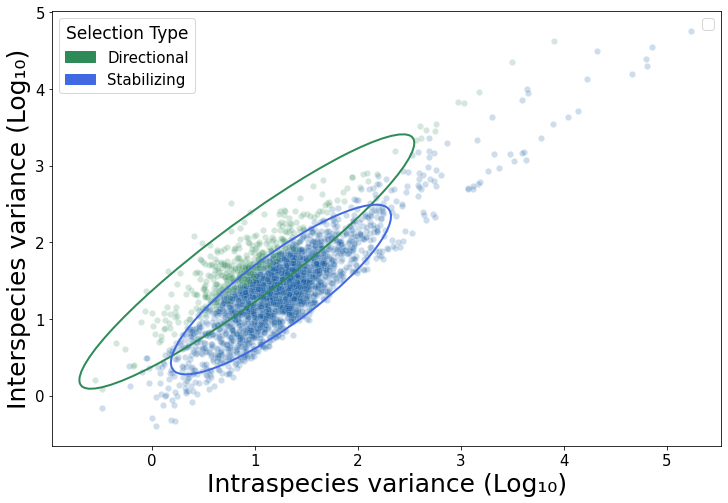

In [5]:
alldata = beta
alldata = pd.concat([alldata, species_count[['between_species_mean', 'within_species_mean', 'within_species_var', 'between_species_var']]], axis = 1).dropna()
alldata['Vg/Vm'] = alldata['Vg']/alldata['average_Vm']

fig, ax = plt.subplots(figsize = (12, 8))

ax2 = sns.scatterplot(ax = ax, x = np.log10(alldata.loc[alldata['color'] == 'lightgrey']['within_variance'] + 0.01), y = np.log10(alldata.loc[alldata['color'] == 'lightgrey']['sigma2'] + 0.01), s = 40, color = sns.color_palette("Blues", as_cmap=False)[-1], palette = sns.color_palette("Blues", as_cmap=False)[:-1], alpha = 0.2)
ax1 = sns.scatterplot(ax = ax, x = np.log10(alldata.loc[alldata['color'] == 'red']['within_variance'] + 0.01), y = np.log10(alldata.loc[alldata['color'] == 'red']['sigma2'] + 0.01), s = 40, color='seagreen', palette = sns.light_palette('seagreen', as_cmap=False)[-1], alpha = 0.2)

confidence_ellipse(np.log10(alldata.loc[alldata['color'] == 'red']['within_variance'] + 0.01), np.log10(alldata.loc[alldata['color'] == 'red']['sigma2'] + 0.01), ax1, n_std=3, edgecolor='seagreen', lw = 2)
confidence_ellipse(np.log10(alldata.loc[alldata['color'] == 'lightgrey']['within_variance'] + 0.01), np.log10(alldata.loc[alldata['color'] == 'lightgrey']['sigma2'] + 0.01), ax2, n_std=2, edgecolor='royalblue', lw = 2)

ax.add_artist(ax.legend(fontsize = 15, loc='upper right'))

direc = mpatches.Patch(color='seagreen', label='Directional')
stab = mpatches.Patch(color='royalblue', label='Stabilizing')
plt.legend(handles=[direc, stab], title = 'Selection Type', fontsize = 15, title_fontsize = 17)

#### Formatting Log10 ####
element = 'Log'
subscript1 = "\u2081"
subscript0 = "\u2080"

plt.xlabel('Intraspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.ylabel('Interspecies variance' + " ("+ f"{element}{subscript1}{subscript0}" + ")", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig('/research/projects/chlamydomonas/NIexpression/data/plots/EVE_model_normal.pdf', dpi = 1600, bbox_inches = 'tight', format = 'pdf')

In [7]:
display(alldata.dropna().loc[alldata['selection'] == 'directional']['average_ED'].describe())
display(alldata.dropna().loc[alldata['selection'] == 'directional']['Vg'].describe())
display(alldata.dropna().loc[alldata['selection'] == 'stabilizing']['average_ED'].describe())
display(alldata.dropna().loc[alldata['selection'] == 'stabilizing']['Vg'].describe())

count    415.000000
mean       0.105729
std        0.043956
min        0.015814
25%        0.074297
50%        0.097268
75%        0.127747
max        0.320048
Name: average_ED, dtype: float64

count    415.000000
mean       0.243540
std        0.181933
min        0.000000
25%        0.126777
50%        0.208277
75%        0.319668
max        1.415712
Name: Vg, dtype: float64

count    2454.000000
mean        0.092029
std         0.033582
min         0.014322
25%         0.068523
50%         0.088885
75%         0.111035
max         0.276019
Name: average_ED, dtype: float64

count    2454.000000
mean        0.400879
std         0.394683
min         0.000000
25%         0.177183
50%         0.307568
75%         0.502079
max         7.305764
Name: Vg, dtype: float64

In [17]:
display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'directional']['average_ED'], 5))
display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'directional']['average_ED'], 95))

display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'directional']['Vg'], 5))
display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'directional']['Vg'], 95))

display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'stabilizing']['average_ED'], 5))
display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'stabilizing']['average_ED'], 95))

display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'stabilizing']['Vg'], 5))
display(np.percentile(alldata.dropna().loc[alldata['selection'] == 'stabilizing']['Vg'], 95))

0.05203649543480384

0.1828694523783653

0.002708943450969735

0.5962045181379936

0.0428474590552346

0.15259678409238003

0.03697359537911969

1.0413283158552997

In [8]:
display(len(alldata.loc[alldata['color'] == 'red']))
display(len(alldata.loc[alldata['color'] == 'lightgrey']))
display(len(alldata))

415

2454

2869

# Comparing Dendrograms between clusters

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

# Custom function to convert the tree to Newick format (simplified)
def tree_to_newick(tree):
    if tree.left is None and tree.right is None:
        return str(tree.id)  # Leaf node (original data point)
    else:
        left = tree_to_newick(tree.left)
        right = tree_to_newick(tree.right)
        return f"({left},{right})"

In [ ]:
abnormal = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_abnormalcluster2.csv', sep = '\t', index_col = 'index')
abnormal['CREN'] = abnormal[['CREN_' + str(i + 1) for i in range(24)]].median(axis = 1)
abnormal = abnormal.drop(columns = ['CREN_' + str(i + 1) for i in range(24)])
abnormal.columns = abnormal.columns.str.replace('_1', '')
abnormal = abnormal.reset_index(drop=True)
abnormal = abnormal.transpose()

normal = pd.read_csv('/research/projects/chlamydomonas/NIexpression/data/expression_divergence/EVE_normalcluster2.csv', sep = '\t', index_col = 'Unnamed: 0')
normal['CREN'] = normal[['CREN_' + str(i + 1) for i in range(24)]].median(axis = 1)
normal = normal.drop(columns = ['CREN_' + str(i + 1) for i in range(24)])
normal.columns = normal.columns.str.replace('_1', '')
normal = normal.reset_index(drop=True)
normal = normal.transpose()

In [ ]:
abnormal_dendro = []
for col in abnormal.columns:
    X = [[i] for i in abnormal[col]]
    Z = linkage(X, 'ward', metric='euclidean')
    tree = sch.to_tree(Z)
    newick_string = tree_to_newick(tree)
    translation_table = str.maketrans({'0': 'CSCH', '1': 'JG05', '2': 'CMAL', '3': 'CINC', '4': 'CREN'})
    newick_string = newick_string.translate(translation_table)
    abnormal_dendro.append(newick_string)

In [ ]:
normal_dendro = []
for col in normal.columns:
    X = [[i] for i in normal[col]]
    Z = linkage(X, 'ward', metric='euclidean')
    tree = sch.to_tree(Z)
    newick_string = tree_to_newick(tree)
    translation_table = str.maketrans({'0': 'CSCH', '1': 'JG05', '2': 'CMAL', '3': 'CINC', '4': 'CREN'})
    newick_string = newick_string.translate(translation_table)
    normal_dendro.append(newick_string)

In [ ]:
eni_abnormal = pd.DataFrame(pd.DataFrame(abnormal_dendro)[0].value_counts())
eni_abnormal.columns = ['abnormal']
eni_normal = pd.DataFrame(pd.DataFrame(normal_dendro)[0].value_counts())
eni_normal.columns = ['normal']

In [ ]:
mm = pd.concat([eni_normal, eni_abnormal], axis = 1)
mm.loc[mm['abnormal'] > 20]['abnormal'].sort_values(ascending = False), mm.loc[mm['normal'] > 20]['normal'].sort_values(ascending = False)